#Por día

In [1]:
import pandas as pd

df = pd.read_csv('CSVs\DevProcesoFormatoTipoSoloAbril.csv', encoding='utf-8',)

df

,folio_recepcion,descripcion,fecha_visacion
0,2024089008,FALTA COTIZ. SALUD,2024-04-02 00:00:00.000
1,2024465698,COTIZ < LIQ DE SUELDO,2024-04-08 00:00:00.000
2,2024482134,NO HAY IMAGENES PARA DESCARGAR,2024-04-10 00:00:00.000
3,2024472066,NO IMAGENES CON API,2024-04-10 00:00:00.000
4,2024475450,COTIZ < LIQ DE SUELDO,2024-04-10 00:00:00.000
...,...,...,...
2692,2024456529,NO PROCESADO MEDIPASS,2024-04-01 00:00:00.000
2693,2024472444,NO IMAGENES CON API,2024-04-10 00:00:00.000
2694,2024479168,NO PROCESADO MEDIPASS,2024-04-04 00:00:00.000
2695,2024465615,NO IMAGENES CON API,2024-04-03 00:00:00.000


In [2]:
df['fecha_visacion'].unique()

array(['2024-04-02 00:00:00.000', '2024-04-08 00:00:00.000',
       '2024-04-10 00:00:00.000', '2024-04-01 00:00:00.000',
       '2024-04-05 00:00:00.000', '2024-04-03 00:00:00.000',
       '2024-04-09 00:00:00.000', '2024-04-04 00:00:00.000',
       '2024-04-11 00:00:00.000', '2024-04-06 00:00:00.000',
       '2024-04-07 00:00:00.000'], dtype=object)

In [2]:
# Convertir la columna fecha_visacion a tipo datetime
df['fecha_visacion'] = pd.to_datetime(df['fecha_visacion'])

df

,folio_recepcion,descripcion,fecha_visacion
0,2024089008,FALTA COTIZ. SALUD,2024-04-02
1,2024465698,COTIZ < LIQ DE SUELDO,2024-04-08
2,2024482134,NO HAY IMAGENES PARA DESCARGAR,2024-04-10
3,2024472066,NO IMAGENES CON API,2024-04-10
4,2024475450,COTIZ < LIQ DE SUELDO,2024-04-10
...,...,...,...
2692,2024456529,NO PROCESADO MEDIPASS,2024-04-01
2693,2024472444,NO IMAGENES CON API,2024-04-10
2694,2024479168,NO PROCESADO MEDIPASS,2024-04-04
2695,2024465615,NO IMAGENES CON API,2024-04-03


In [3]:
#df['fecha_visacion'] = df['fecha_visacion'].dt.to_period('')

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

not_includes_dates = ['2024-04-06', '2024-04-07', '2024-04-11']

#not_includes_dates_con_tiempo = [f'{fecha} 00:00:00' for fecha in not_includes_dates]


filtro_fecha = (df['fecha_visacion'] >= '2023-08') & (~df['fecha_visacion'].isin(not_includes_dates))

# Aplicar el filtro para seleccionar solo las filas a partir de agosto de 2023
df = df[filtro_fecha]

# Contar la cantidad de errores por fecha
error_count_by_date = df.groupby(['fecha_visacion', 'descripcion']).count().unstack(fill_value=0).reset_index()



error_count_by_date

fecha_visacion       folio_recepcion                     \
descripcion                COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0               2024-04-01                   126                 30   
1               2024-04-02                    66                 28   
2               2024-04-03                    60                 20   
3               2024-04-04                    77                 53   
4               2024-04-05                    39                 30   
5               2024-04-08                    54                 40   
6               2024-04-09                    49                 30   
7               2024-04-10                    46                 47   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                            0               
1                                                            1               
2                                                            0               
3                                                            0               
4                                                            2               
5                                                            2               
6                                                            0               
7                                                            0               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                       16                 138   
1                                       18                   0   
2                                        9                 202   
3                                       14                   3   
4                                        6                   0   
5                                       13                  67   
6                                        8                   2   
7                                       12                 147   

                                                              \
descripcion NO PROCESADO MEDIPASS NO SE ENCUENTRA CODIGO AFP   
0                             204                          0   
1                             140                          0   
2                              78                          0   
3                             134                          0   
4                             101                          1   
5                             170                          0   
6                              95                          0   
7                             161                          0   

                                                                     
descripcion NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS RENTA = TOPE  
0                                                    1           14  
1                                                    0            8  
2                                                    1            8  
3                                                    0            9  
4                                                    1            6  
5                                                    0            4  
6                                                    0           11  
7                                                    0            5

In [4]:

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_visacion       folio_recepcion                     \
descripcion                COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0               2024-04-01             23.818526           5.671078   
1               2024-04-02             25.287356          10.727969   
2               2024-04-03             15.873016           5.291005   
3               2024-04-04             26.551724          18.275862   
4               2024-04-05             20.967742          16.129032   
5               2024-04-08             15.428571          11.428571   
6               2024-04-09             25.128205          15.384615   
7               2024-04-10             11.004785          11.244019   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                     0.000000               
1                                                     0.383142               
2                                                     0.000000               
3                                                     0.000000               
4                                                     1.075269               
5                                                     0.571429               
6                                                     0.000000               
7                                                     0.000000               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                 3.024575           26.086957   
1                                 6.896552            0.000000   
2                                 2.380952           53.439153   
3                                 4.827586            1.034483   
4                                 3.225806            0.000000   
5                                 3.714286           19.142857   
6                                 4.102564            1.025641   
7                                 2.870813           35.167464   

                                                              \
descripcion NO PROCESADO MEDIPASS NO SE ENCUENTRA CODIGO AFP   
0                       38.563327                   0.000000   
1                       53.639847                   0.000000   
2                       20.634921                   0.000000   
3                       46.206897                   0.000000   
4                       54.301075                   0.537634   
5                       48.571429                   0.000000   
6                       48.717949                   0.000000   
7                       38.516746                   0.000000   

                                                                     \
descripcion NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS RENTA = TOPE   
0                                             0.189036     2.646503   
1                                             0.000000     3.065134   
2                                             0.264550     2.116402   
3                                             0.000000     3.103448   
4                                             0.537634     3.225806   
5                                             0.000000     1.142857   
6                                             0.000000     5.641026   
7                                             0.000000     1.196172   

            TOTAL_PUBLICADOS  
descripcion                   
0                        529  
1                        261  
2                        378  
3                        290  
4                        186  
5                        350  
6                        195  
7                        418

Reemplaza las columnas de eror_percentages

In [5]:

# Mostrar el resultadod
#error_percentages.set_index('date', inplace=True)

#Con todas las descripciones
'''error_percentages.columns = 
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION',#nuevo
   'TOTAL_errores']'''

#Descripciones seleccionadas
error_percentages.columns = ['date',
    'COTIZ < LIQ DE SUELDO',
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'TOTAL_errores']




error_percentages

,date,COTIZ < LIQ DE SUELDO,FALTA COTIZ. SALUD,FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL,NO HAY IMAGENES PARA DESCARGAR,NO IMAGENES CON API,NO PROCESADO MEDIPASS,NO SE ENCUENTRA CODIGO AFP,NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS,RENTA = TOPE,TOTAL_errores
0,2024-04-01,23.818526,5.671078,0.000000,3.024575,26.086957,38.563327,0.000000,0.189036,2.646503,529
1,2024-04-02,25.287356,10.727969,0.383142,6.896552,0.000000,53.639847,0.000000,0.000000,3.065134,261
2,2024-04-03,15.873016,5.291005,0.000000,2.380952,53.439153,20.634921,0.000000,0.264550,2.116402,378
3,2024-04-04,26.551724,18.275862,0.000000,4.827586,1.034483,46.206897,0.000000,0.000000,3.103448,290
4,2024-04-05,20.967742,16.129032,1.075269,3.225806,0.000000,54.301075,0.537634,0.537634,3.225806,186
5,2024-04-08,15.428571,11.428571,0.571429,3.714286,19.142857,48.571429,0.000000,0.000000,1.142857,350
6,2024-04-09,25.128205,15.384615,0.000000,4.102564,1.025641,48.717949,0.000000,0.000000,5.641026,195
7,2024-04-10,11.004785,11.244019,0.000000,2.870813,35.167464,38.516746,0.000000,0.000000,1.196172,418


In [6]:
error_percentages['date'] = pd.to_datetime(error_percentages['date'])

error_percentages.dtypes

date                                                              datetime64[ns]
COTIZ < LIQ DE SUELDO                                                    float64
FALTA COTIZ. SALUD                                                       float64
FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL           float64
NO HAY IMAGENES PARA DESCARGAR                                           float64
NO IMAGENES CON API                                                      float64
NO PROCESADO MEDIPASS                                                    float64
NO SE ENCUENTRA CODIGO AFP                                               float64
NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS                               float64
RENTA = TOPE                                                             float64
TOTAL_errores                                                              int64
dtype: object

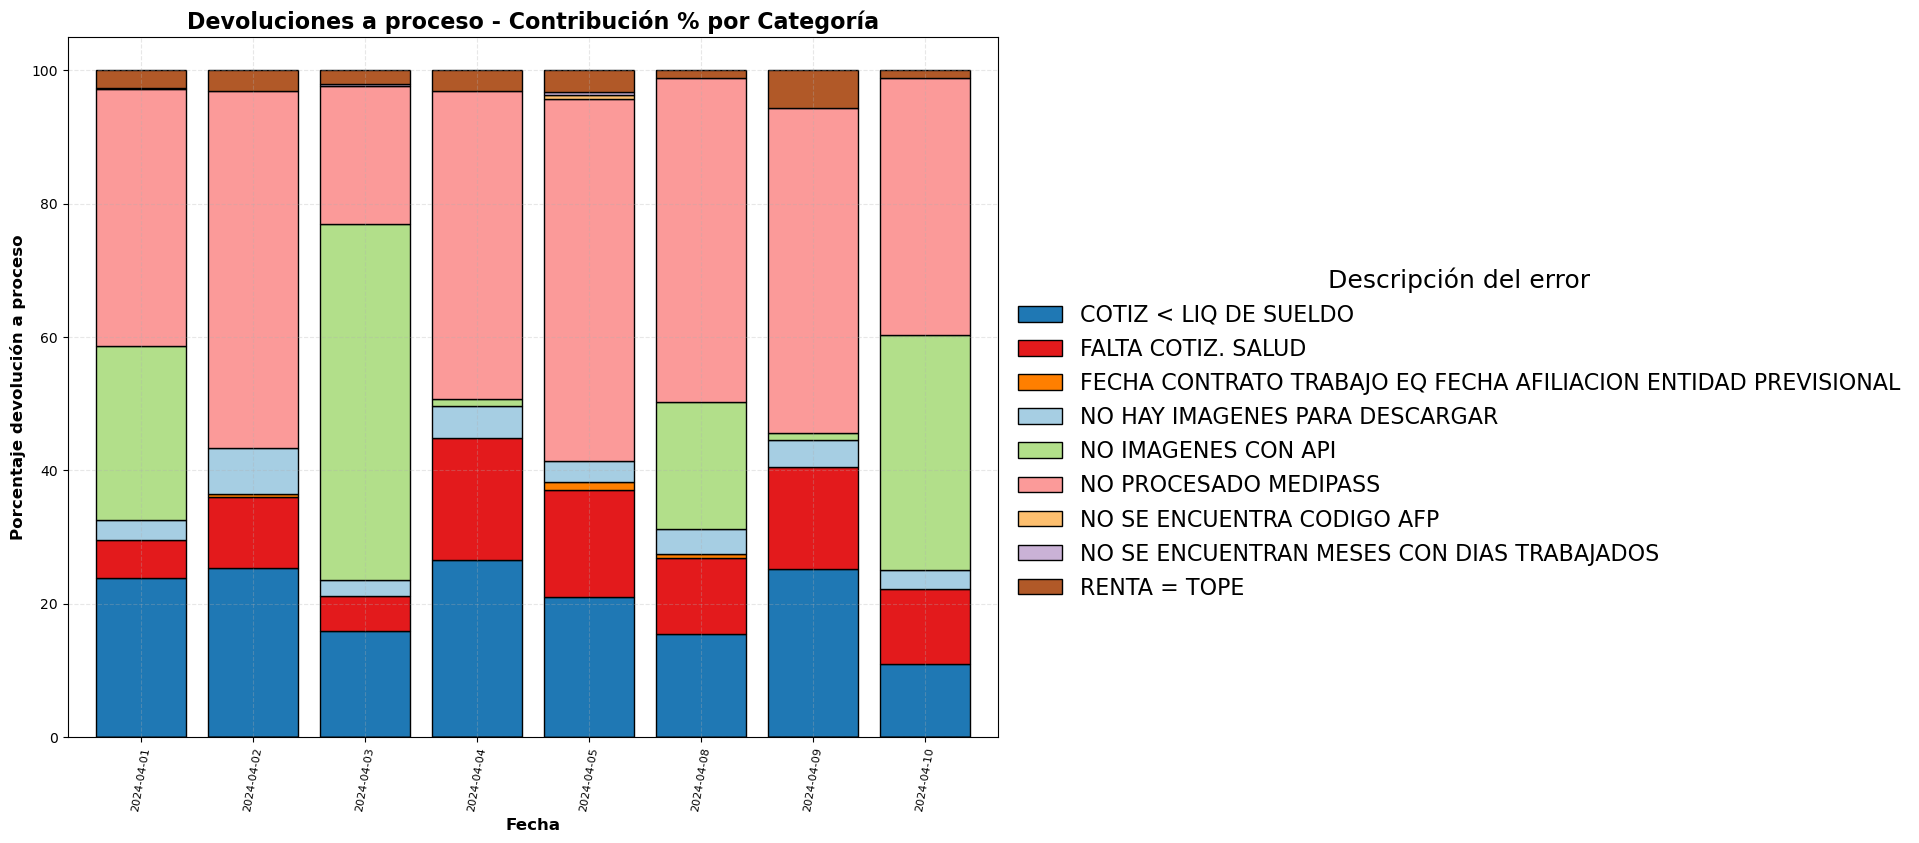

In [8]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path


error_percentages['date'] = error_percentages['date'].dt.strftime('%Y-%m-%d')

columnas_grafica = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    #'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    #'SOBRE 60 ANIOS SIN PENSION'#nuevo
    ]



colores_distintivos = {
    'COTIZ < LIQ DE SUELDO': '#1f78b4',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES': '#33a02c',
    'FALTA COTIZ. SALUD': '#e31a1c',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': '#ff7f00',
    #'NO DERECHO A PAGO SUBSIDIO': '#6a3d9a',
    'NO HAY IMAGENES PARA DESCARGAR': '#a6cee3',
    'NO IMAGENES CON API': '#b2df8a',
    'NO PROCESADO MEDIPASS': '#fb9a99',
    'NO SE ENCUENTRA CODIGO AFP': '#fdbf6f',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS': '#cab2d6',
    'RENTA = TOPE': '#b15928',
    #'SOBRE 60 ANIOS SIN PENSION': '#fdbf6f'
}
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripción del error', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=16, title_fontsize=18, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
#ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

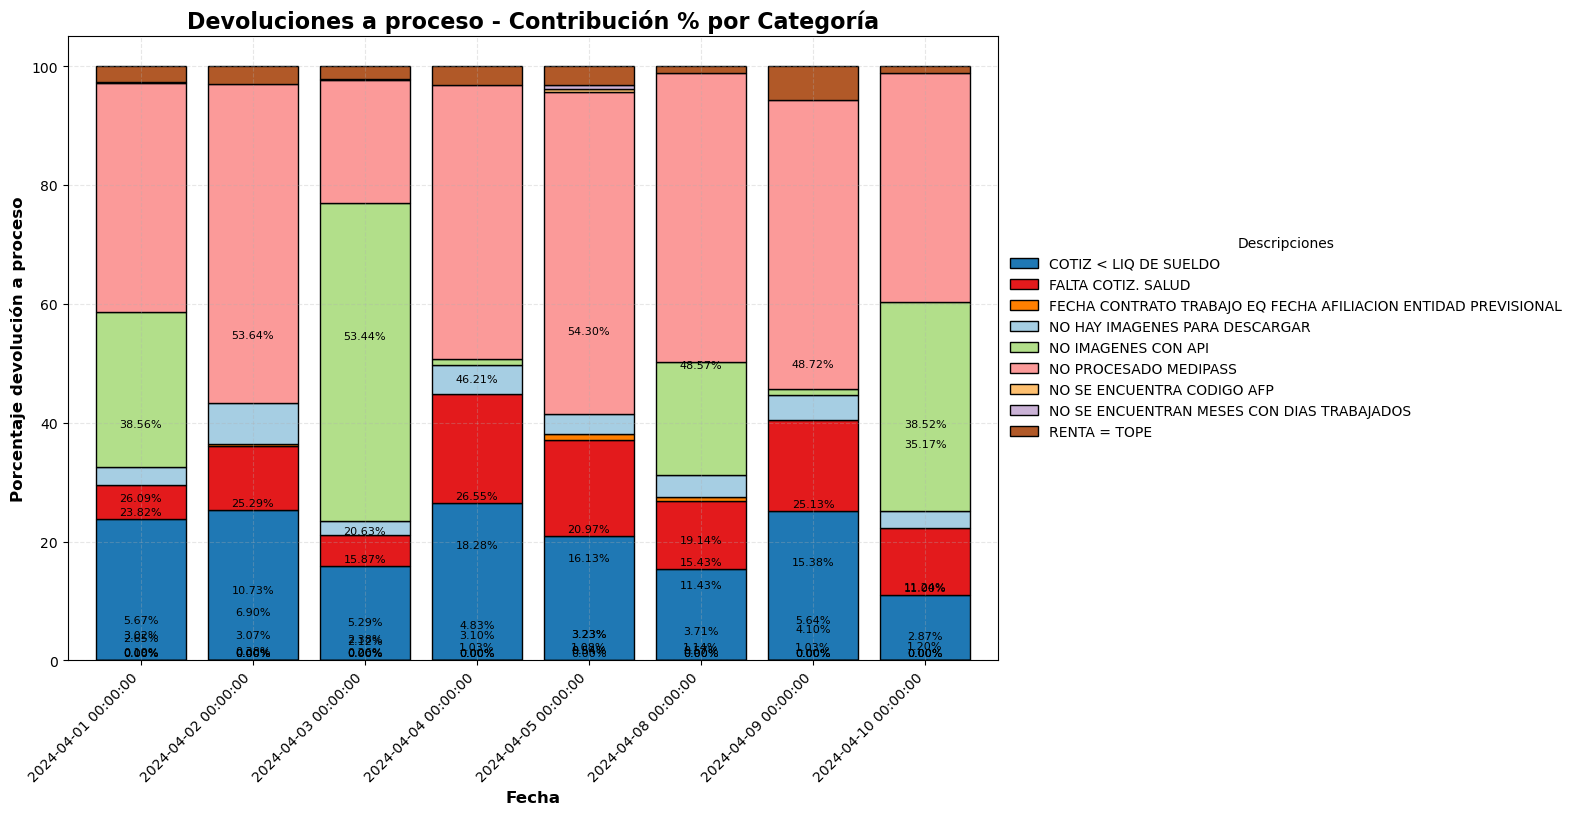

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold', loc='center')  # Alinea el título al centro
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=45, ha='right')  # Ajusta la rotación y alineación de las etiquetas del eje x
plt.yticks(fontsize=10)  # Aumenta el tamaño de la fuente en el eje y

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.1)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

Este no duncion... Todavia


<Figure size 1200x800 with 0 Axes>

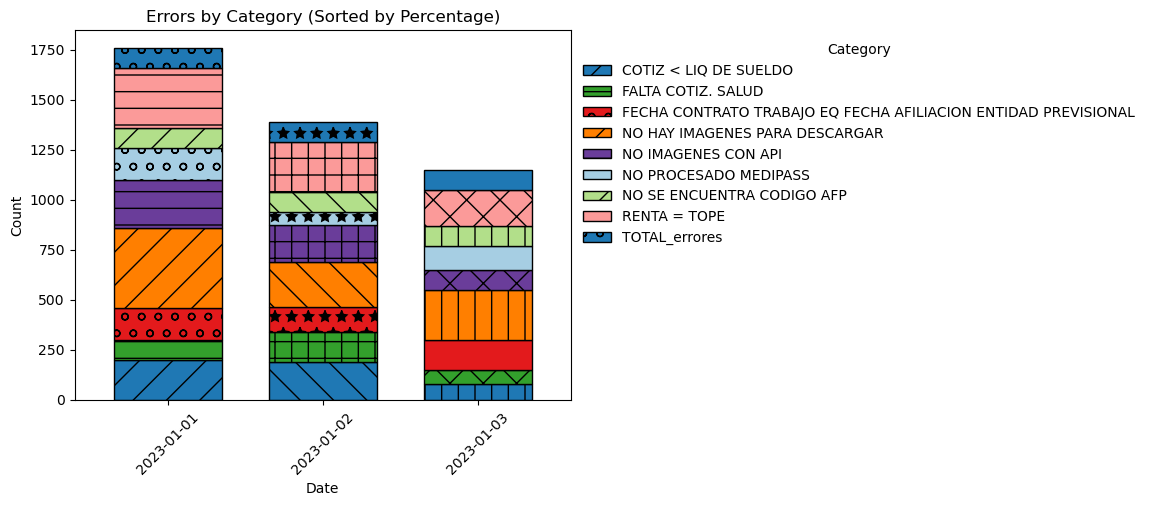

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

